KNN



In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
 
class KNN():
  
  def __init__(self,k):
    self.k=k

  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train

  def euclidean_distance(self,point1,point2):
    return np.sqrt(np.sum((point1 - point2) ** 2)) 
  
  def nearest_neighbors(self,test_sample):
    distances=[]#Calcular las distancias desde el punto de prueba a cada punto en el conjunto de entrenamiento
    for i in range(len(self.x_train)):
      distance = self.euclidean_distance(self.x_train[i], test_sample)
      distances.append((self.y_train[i],distance))#Agregar la etiqueta y la distancia
    distances.sort(key=lambda x:x[1])#Ordenar las distancias en orden ascendente
    neighbors=[]
    for i in range(self.k): #Obtiene los primeros k vecinos más cercanos
      neighbors.append(distances[i][0]) 
    return neighbors
  
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neighbors=self.nearest_neighbors(test_sample)
      prediction=max(set(neighbors), key=neighbors.count)
      predictions.append(int(prediction))
    return predictions
  

X_train = np.array([[1, 1], [2, 2], [3, 3], [6, 5], [7, 6], [8, 8], [9, 10], [10, 11]])
y_train = np.array([0, 0, 1, 1, 2, 2, 2, 0])
X_test = np.array([[4, 5], [7, 8], [9, 9], [2, 1]])

knn=KNN(5) #mi modelo
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)
print("Predictions knn:", predictions)

knn_sklearn=KNeighborsClassifier(n_neighbors=5)#modelo sklearn
knn_sklearn.fit(X_train,y_train)
predictions_sklearn=knn_sklearn.predict(X_test)
print("Predictions knn_sklearn:", predictions_sklearn)



Predictions knn: [0, 2, 2, 0]
Predictions knn_sklearn: [0 2 2 0]



K-Means 

(500, 2)
3
Centroids (custom): [[-1.86315371 -8.87400825]
 [-0.86175784 -3.87190776]
 [ 5.88032652 -4.18480765]]
Centroids (sklearn): [[-1.86315371 -8.87400825]
 [ 5.88032652 -4.18480765]
 [-0.86175784 -3.87190776]]


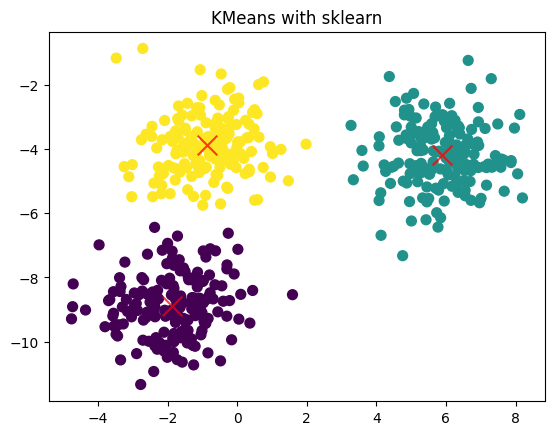

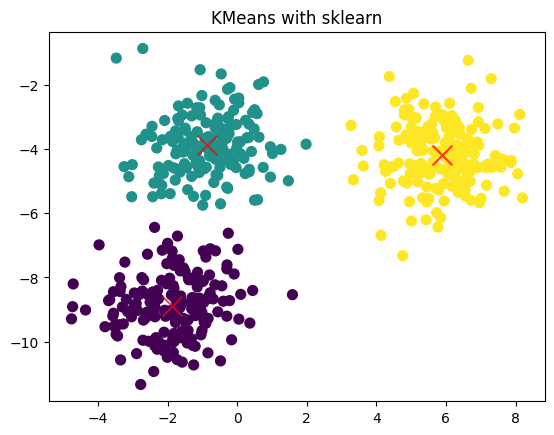

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as SKLearnKMeans

class KMeans:
    def __init__(self, k=2, max_iters=100, plot_steps=False):
        self.k = k
        self.max_iters = max_iters
        # self.plot_steps = plot_steps
        self.clusters = []
        for _ in range(self.k):
            self.clusters.append([])
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        random_sample_idxs = np.random.choice(self.n_samples, self.k, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        for _ in range(self.max_iters):
            # asigna las muestras a los centroides más cercanos (crea clusters)
            self.clusters = self._create_clusters(self.centroids)
            centroids_old = self.centroids
            # calcula los nuevos centroides a partir de los clusters
            self.centroids = self._get_centroids(self.clusters)
            # compara los centroids_old con los nuevos centroides (si no cambian mucho entonces se detiene)
            if self._is_converged(centroids_old, self.centroids):
                break
        # clasifica los datos, cada etiqueta indica a qué clúster pertenece
        return self._get_cluster_labels(self.clusters)
    
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_id, cluster in enumerate(clusters):
            for sample_id in cluster:
                labels[sample_id] = cluster_id
        return labels

    def _create_clusters(self, centroids):
        # asigna las muestras a los centroides más cercanos para crear clusters
        clusters = [[] for _ in range(self.k)]
        for id, sample in enumerate(self.X):
            centroid_id = self._closest_centroid(sample, centroids)
            clusters[centroid_id].append(id)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distancia euclidiana entre el punto y los centroides
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_id = np.argmin(distances)
        return closest_id


    def _get_centroids(self, clusters):
        # asigna la media de los clusters a los centroides
        centroids = np.zeros((self.k, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # calcula la distancia entre los centroides antiguos y nuevos
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.k)]
        return sum(distances) == 0

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

    

# Datos de ejemplo
X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)
np.random.seed(42)

#Mi KMeans
kmeans = KMeans(k=clusters, max_iters=150)
y_pred = kmeans.predict(X)

#KMeans de sklearn
kmeans_sklearn = SKLearnKMeans(n_clusters=clusters, random_state=42)
y_pred_sklearn = kmeans_sklearn.fit_predict(X)

# Comparar los centroides
print("Centroids (custom):", kmeans.centroids)
print("Centroids (sklearn):", kmeans_sklearn.cluster_centers_)

# Graficar resultados de sklearn
plt.scatter(X[:, 0], X[:, 1], c=y_pred_sklearn, s=50, cmap='viridis')
centers = kmeans_sklearn.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title("KMeans with sklearn")
plt.show()


plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
centers = np.array(kmeans.centroids)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title("KMeans with sklearn")
plt.show()




SVM

Predictions: [ 1.  1.  1. -1.  1.  1. -1. -1. -1.  1.]
Predictions sklearn: [ 1  1  1 -1  1  1 -1 -1 -1  1]
SVM classification accuracy 1.0
SVM classification accuracy 1.0


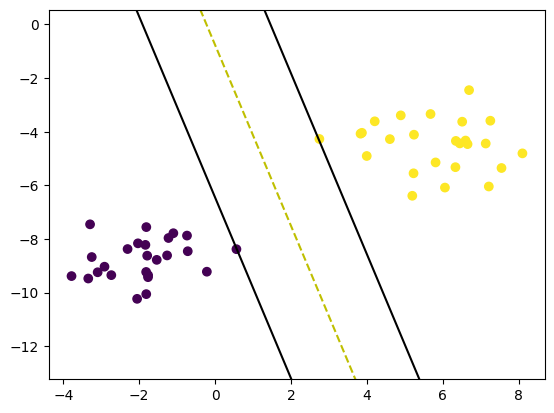

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import svm as SKLearnSVM


class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.weight = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Convierte las etiquetas a -1 y 1
        y_ = np.where(y <= 0, -1, 1)

        # inicializa los weights y el bias
        self.weight = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for sample_id, sample_i in enumerate(X):
                # Verificar la condición de margen
                condition = y_[sample_id] * (np.dot(sample_i, self.weight) - self.bias) >= 1
                if condition:
                    # Si se cumple actualiza los pesos aplicando solo la penalización de regularización.
                    self.weight -= self.lr * (2 * self.lambda_param * self.weight)
                else:
                    # Si no, se actualizan los pesos aplicando la penalización de regularización y el término de error.
                    self.weight -= self.lr * (2 * self.lambda_param * self.weight - np.dot(sample_i, y_[sample_id]))
                    # y se actualiza el bias
                    self.bias -= self.lr * y_[sample_id]


    def predict(self, X):
        approx = np.dot(X, self.weight) - self.bias
        return np.sign(approx)



# Datos de ejemplo
X, y = datasets.make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)
y = np.where(y == 0, -1, 1)

# X = np.array([[2, 3], [3, 4], [4, 1], [6, 5], [7, 8], [8, 6]])
# y = np.array([1, 1, -1, -1, 1, -1])
# X_test = np.array([[3, 3], [5, 5], [6, 6]])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)


# mi modelo
clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("Predictions:", predictions)

svm=SKLearnSVM.SVC()
svm.fit(X_train, y_train)    
predictions_sklearn=svm.predict(X_test)
print("Predictions sklearn:", predictions_sklearn)


def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("SVM classification accuracy", accuracy(y_test, predictions))
print("SVM classification accuracy", accuracy(y_test, predictions_sklearn))


def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.weight, clf.bias, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.weight, clf.bias, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.weight, clf.bias, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.weight, clf.bias, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.weight, clf.bias, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.weight, clf.bias, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

visualize_svm()

regresion lineal 

MSE: 305.7719958301902
MSE sklearn: 305.7741316228643
Accuracy: 0.9253717934621971
Accuracy sklearn: 0.9253717934621973


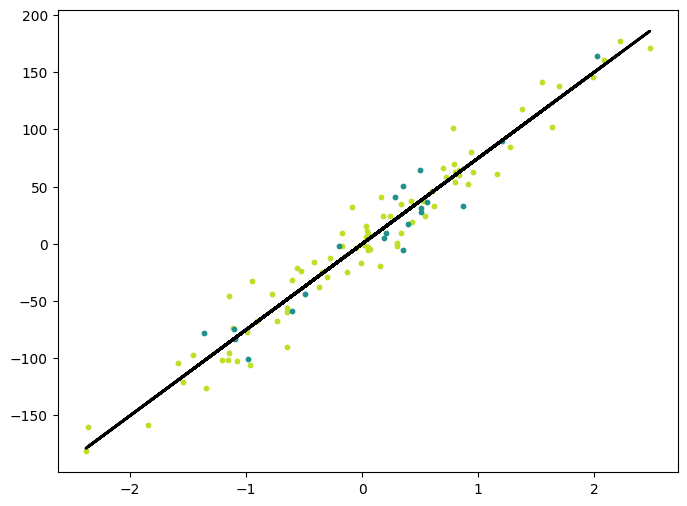

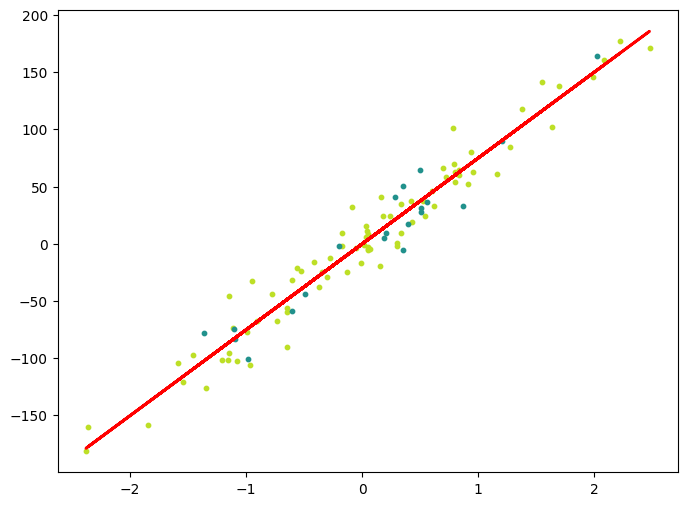

In [4]:
from sklearn.linear_model import LinearRegression as SKLinearRegression

class LinearRegression:

    def __init__(self, lr = 0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.slope = None    
        self.intercept = None  
    
    def fit(self, X, y):
        # Ajusta la regresión lineal encontrando los valores óptimos de la pendiente y el intercepto.
        n_samples, n_features = X.shape
        self.slope = np.zeros(n_features)  # Inicializamos la pendiente en ceros
        self.intercept = 0                # Inicializamos el intercepto en cero

        # Descenso de gradiente para optimizar la pendiente y el intercepto
        for _ in range(self.n_iters):
            # Predicción con la pendiente y el intercepto actuales
            y_pred = np.dot(X, self.slope) + self.intercept

            # Se calvula los gradientes de la pendiente y el intercepto
            d_slope = (1 / n_samples) * np.dot(X.T, (y_pred - y)) 
            d_intercept = (1 / n_samples) * np.sum(y_pred - y) 

            # Actualización de la pendiente y el intercepto usando la tasa de aprendizaje
            self.slope -= self.lr * d_slope
            self.intercept -= self.lr * d_intercept

    def predict(self, X):
        y_pred = np.dot(X, self.slope) + self.intercept
        return y_pred
    



def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X, y = datasets.make_regression(
    n_samples=100, n_features=1, noise=20, random_state=4
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

# mi modelo
regressor = LinearRegression(lr=0.01, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

# modelo de sklearn
regressor_sklearn = SKLinearRegression()
regressor_sklearn.fit(X_train, y_train)
predictions_sklearn = regressor_sklearn.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mse_sklearn = mean_squared_error(y_test, predictions_sklearn)
print("MSE:", mse)
print("MSE sklearn:", mse_sklearn)

accu = r2_score(y_test, predictions)
accu_sklearn = r2_score(y_test, predictions_sklearn)
print("Accuracy:", accu)
print("Accuracy sklearn:", accu_sklearn)


y_pred_line = regressor.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.show()

y_pred_line_sklearn = regressor_sklearn.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line_sklearn, color="red", linewidth=2, label="Prediction sklearn")
plt.show()


Regresion logidtica

In [5]:
from sklearn.linear_model import LogisticRegression as SKLearnLogisticRegression

class LogisticRegression():

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            # Calcula la predicción lineal: z = w·x + b
            linear_pred = np.dot(X, self.weights) + self.bias
            # Se aplica la función sigmoide para obtener probabilidades
            predictions = sigmoid(linear_pred)

            # Se calculan los gradientes
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            # Actualiza los pesos y el bias
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        # Clasifica basandose en un umbral de 0.5
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred


def sigmoid(x):
    return 1/(1+np.exp(-x))

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

# mi modelo
regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

# modelo de sklearn
regressor_sklearn = SKLearnLogisticRegression(max_iter=1000)
regressor_sklearn.fit(X_train, y_train)
predictions_sklearn = regressor_sklearn.predict(X_test,)

print("LR classification accuracy:", accuracy(y_test, predictions))
print("LR classification accuracy sklearn:", accuracy(y_test, predictions_sklearn))



LR classification accuracy: 0.9298245614035088
LR classification accuracy sklearn: 0.9473684210526315


/Users/claudia/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive bayes

In [6]:
import numpy as np

class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # Se inicializa la media, varianza y probabilidad de cada clase
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._prob = np.zeros(n_classes, dtype=np.float64)

        # Se calcula la media, varianza y probabilidad de que una muestra pertenezca a una clase
        for idx, c in enumerate(self._classes):
            X_c = X[y == c] # Filtrar las muestras que pertenecen a la clase c
            self._mean[idx, :] = X_c.mean(axis=0) # Calcula la media de las características para la clase c
            self._var[idx, :] = X_c.var(axis=0)# Calcula la varianza de las características para la clase c
            self._prob[idx] = X_c.shape[0] / float(n_samples) # Calcular la proporción de muestras que pertenecen a la clase c
            

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):

        # Predice la clase para una muestra individual.
        class_probabilities = []

        # Calcula la probabilidad de que la muestra pertenezca a cada clase
        for idx, c in enumerate(self._classes):
            # Calcula la probabilidad de que la muestra pertenezca a la clase c
            class_probability = np.log(self._prob[idx])
            # Calcula la probabilidad de las características de la muestra dado que pertenece a la clase c
            feature_probability = np.sum(np.log(self._pdf(idx, x)))
           # Suma las probabilidades
            total_probability = class_probability + feature_probability
            # Añade la probabilidad total a la lista
            class_probabilities.append(total_probability)

        # Retornar la clase con la mayor probabilidad total
        return self._classes[np.argmax(class_probabilities)]

    def _pdf(self, class_idx, x):
        # Calcula la función de densidad de probabilidad (PDF) para una muestra y una clase.
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator



def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_classification(
    n_samples=1000, n_features=10, n_classes=2, random_state=123
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

# mi modelo
naive_bayes = NaiveBayes()
naive_bayes.fit(X_train, y_train)
predictions = naive_bayes.predict(X_test)

# modelo de sklearn
from sklearn.naive_bayes import GaussianNB
naive_bayes_sklearn = GaussianNB()
naive_bayes_sklearn.fit(X_train, y_train)
predictions_sklearn = naive_bayes_sklearn.predict(X_test)

print("Naive Bayes classification accuracy", accuracy(y_test, predictions))
print("Naive Bayes classification accuracy sklearn", accuracy(y_test, predictions_sklearn))

Naive Bayes classification accuracy 0.965
Naive Bayes classification accuracy sklearn 0.965


PCA

Shape of X: (150, 4)
Shape of transformed X: (150, 2)
Shape of transformed X (with sklearn): (150, 2)


/var/folders/6d/z_8xhgb97xj0z9zh0g0d3xw00000gp/T/ipykernel_84503/2264387200.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  pca_transform[:, 0], pca_transform[:, 1], c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)


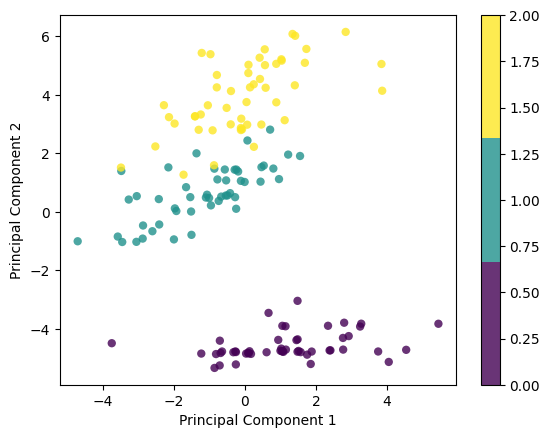

/var/folders/6d/z_8xhgb97xj0z9zh0g0d3xw00000gp/T/ipykernel_84503/2264387200.py:62: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  pca_transform_sklearn[:, 0], pca_transform_sklearn[:, 1], c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)


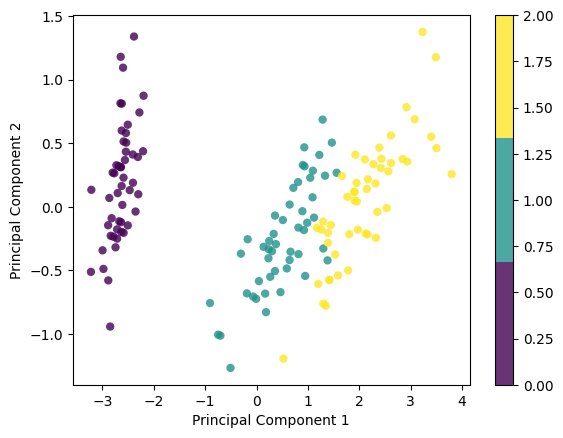

In [8]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Se estandarizar los datos para que tengan  media cero y  varianza uno.
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        # Calcular la matriz de covarianza
        cov = np.cov(X.T)

        # eCalcular los valores y vectores propios
        eigenvectors, eigenvalues = np.linalg.eig(cov)

        # Ordenar los vectores propios por sus valores propios en orden descendente
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # Seleccionar los primeros n_components vectores propios
        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        # Proyectar los datos en el nuevo espacio de características
        X = X - self.mean
        return np.dot(X, self.components.T)


# Datos de ejemplo
data = datasets.load_iris()
X = data.data
y = data.target

# mi modelo
pca = PCA(2)
pca.fit(X)
pca_transform = pca.transform(X)

# Con sklearn
from sklearn.decomposition import PCA as SKLearnPCA
pca_sklearn = SKLearnPCA(2)
pca_transform_sklearn = pca_sklearn.fit_transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", pca_transform.shape)
print("Shape of transformed X (with sklearn):", pca_transform_sklearn.shape)

plt.scatter(
    pca_transform[:, 0], pca_transform[:, 1], c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

plt.scatter(
    pca_transform_sklearn[:, 0], pca_transform_sklearn[:, 1], c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

DBSCAN

In [13]:
from sklearn.cluster import DBSCAN as SklearnDBSCAN
from sklearn.datasets import make_blobs

class DBSCAN:
    def __init__(self, eps, MinPts):
        self.eps=eps #Distancia umbral para considerar vecinos.
        self.MinPts = MinPts #minimo de puntos requeridos para formar un cluster

    def fit(self, datos):

        # Inicializar etiquetas para cada punto: 0 (no visitado aún)
        labels = [0]*len(datos)
        cluster_id = 0  # Identificador del clúster actual

        # Se itera sobre cada punto
        for id in range(0, len(datos)):
            # Se saltan los puntos que ya han sido asignados a un clúster o etiquetados como ruido
            if labels[id] != 0:
                continue
            # Se buscan los vecinos del punto actual
            NeighborPts = self.regionQuery(datos, id, self.eps)
            # Si el número de vecinos en el eps es menor que el mínimo de puntos se etiqueta como ruido (-1)
            if len(NeighborPts) < self.MinPts:
                labels[id] = -1
            else: 
                # Si no se crea un nuevo clúster y se expande
                cluster_id += 1
                self.growCluster(datos, labels, id, NeighborPts, cluster_id, self.eps, self.MinPts)
    
        return labels
        
    def growCluster(self,datos, labels, id_punto, NeighborPts, cluster_id, eps, MinPts):

         # se le asignar el punto núcleo al clúster actual
        labels[id_punto] = cluster_id
        i = 0  # Índice para recorrer la lista de vecinos
        while i < len(NeighborPts):    
            neighbor_id = NeighborPts[i]
            # Si el vecino es ruido, se le asigna al clúster actual
            if labels[neighbor_id] == -1:
                labels[neighbor_id] = cluster_id
            # Si el vecino aún no está asignado a ningún clúster se asigna al clúster actual
            elif labels[neighbor_id] == 0:
                labels[neighbor_id] = cluster_id
                # Se buscan los vecinos de este punto
                new_neighbor = self.regionQuery(datos, neighbor_id, eps)
                # Si tiene suficientes vecinos, se agrega a la lista de expansión
                if len(new_neighbor) >= MinPts:
                    NeighborPts = NeighborPts + new_neighbor
            i += 1  # Avanzar al siguiente vecino        
        

    def regionQuery(self,datos, id_punto, eps):
        # Encuentra todos los puntos en el conjunto de datos que están dentro del eps del punto.
        neighbors = []
        for p in range(0, len(datos)):
            if np.linalg.norm(datos[id_punto] - datos[p]) < eps:
                neighbors.append(p)
                
        return neighbors
    
# Datos de ejemplo
datos1 = np.array([
    [1, 2], [2, 2], [2, 3],
    [8, 7], [8, 8], [7, 8],
    [100, 100]
])

datos2, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)


# mi modelo
print("Aplicando mi DBSCAN ejemplo 1")
dbscan1 = DBSCAN(eps=1.5, MinPts=2)
etiquetas1 = dbscan1.fit(datos1)
print("Etiquetas de los clústeres dbscan:", etiquetas1)

#scikit-learn
print("Aplicando DBSCAN ejemplo 1 de Scikit-learn...")
dbscan_sklearn1 = SklearnDBSCAN(eps=1.5, min_samples=2)
etiquetas_sklearn1 = dbscan_sklearn1.fit_predict(datos1)
print("Etiquetas de los clústeres dbscan:", etiquetas_sklearn1)

print("Aplicando mi DBSCAN ejemplo 2")
dbscan2 = DBSCAN(eps=0.5, MinPts=5)
etiquetas2 = dbscan2.fit(datos2)
print(f"Etiquetas de los clústeres dbscan:\n{etiquetas2[:20]}") 

print("Aplicando DBSCAN de Scikit-learn ejemplo 2")
dbscan_sklearn2 = SklearnDBSCAN(eps=0.5, min_samples=5)
etiquetas_sklearn2 = dbscan_sklearn2.fit_predict(datos2)
print(f"Etiquetas de los clústeres dbscan:\n{etiquetas_sklearn2[:20]}") 


Aplicando mi DBSCAN ejemplo 1
Etiquetas de los clústeres dbscan: [1, 1, 1, 2, 2, 2, -1]
Aplicando DBSCAN ejemplo 1 de Scikit-learn...
Etiquetas de los clústeres dbscan: [ 0  0  0  1  1  1 -1]
Aplicando mi DBSCAN ejemplo 2
Etiquetas de los clústeres dbscan::
[1, 1, 2, 3, 1, 3, 2, 3, 2, 2, 2, 3, 2, 2, 1, 2, 1, -1, 2, 2]
Aplicando DBSCAN de Scikit-learn ejemplo 2
Etiquetas de los clústeres dbscan::
[ 0  0  1  2  0  2  1  2  1  1  1  2  1  1  0  1  0 -1  1  1]


CNN

In [ ]:
import mnist
import numpy as np
from conv import Conv3x3  # Capa convolucional 3x3
from maxpool import MaxPool2  # Capa de Max-Pooling 2x2
from softmax import Softmax  # Capa Softmax para clasificación

class CNN:

    def __init__(self, num_filters=8, learning_rate=0.005):
 
        self.learning_rate = learning_rate

        # Inicialización de las capas
        self.conv_layer = Conv3x3(num_filters)                  # Capa convolucional 3x3
        self.pool_layer = MaxPool2()                            # Capa de MaxPooling 2x2
        self.softmax_layer = Softmax(13 * 13 * num_filters, 10) # Capa Softmax (10 clases para dígitos)

    def forward(self, image, label):

        # Normalización de la imagen al rango [-0.5, 0.5]
        normalized_image = (image / 255) - 0.5

        # Propagación hacia adelante en cada capa
        out = self.conv_layer.forward(normalized_image)
        out = self.pool_layer.forward(out)
        out = self.softmax_layer.forward(out)

        # Cálculo de la pérdida de entropía cruzada
        loss = -np.log(out[label])

        # Precisión: 1 si la predicción es correcta, de lo contrario 0
        acc = 1 if np.argmax(out) == label else 0

        return loss, acc, out

    def train_step(self, image, label):
   
        # Propagación hacia adelante
        loss, acc, out = self.forward(image, label)

        # Gradiente inicial para retropropagación
        gradient = np.zeros(10)
        gradient[label] = -1 / out[label]  # Derivada respecto a la salida

        # Retropropagación en cada capa
        gradient = self.softmax_layer.backprop(gradient, self.learning_rate)
        gradient = self.pool_layer.backprop(gradient)
        gradient = self.conv_layer.backprop(gradient, self.learning_rate)

        return loss, acc

    def train(self, train_images, train_labels, epochs=3):
        print("¡Entrenamiento iniciado!")

        for epoch in range(epochs):
            print(f'--- Época {epoch + 1} ---')

            # Mezclar los datos de entrenamiento
            permutation = np.random.permutation(len(train_images))
            train_images = train_images[permutation]
            train_labels = train_labels[permutation]

            loss = 0
            num_correct = 0

            for i, (image, label) in enumerate(zip(train_images, train_labels)):
                # Mostrar progreso cada 100 pasos
                if i % 100 == 99:
                    print(f'[Paso {i + 1}] Pérdida Promedio: {loss / 100:.3f} | Precisión: {num_correct}%')
                    loss = 0
                    num_correct = 0

                # Realizar un paso de entrenamiento
                l, acc = self.train_step(image, label)
                loss += l
                num_correct += acc

    def evaluate(self, test_images, test_labels):
        print("\n--- Evaluando la CNN ---")
        loss = 0
        num_correct = 0

        for image, label in zip(test_images, test_labels):
            l, acc, _ = self.forward(image, label)
            loss += l
            num_correct += acc

        num_tests = len(test_images)
        print(f'Pérdida en prueba: {loss / num_tests:.3f}')
        print(f'Precisión en prueba: {num_correct / num_tests:.2%}')



RNN

In [ ]:
from numpy.random import randn

class RNN:

  def __init__(self, input_size, output_size, hidden_size=64):
    # Weights
    self.hidden_to_hidden_w = randn(hidden_size, hidden_size) / 1000 # Pesos de las capas ocultas a las ocultas
    self.input_to_hidden_w = randn(hidden_size, input_size) / 1000 # Pesos de la entrada a la capa oculta
    self.hidden_to_output_w = randn(output_size, hidden_size) / 1000 # Peso de la capa oculta a la salida 

    # Biases
    self.hidden_b = np.zeros((hidden_size, 1)) # Sesgo de la capa oculta
    self.hiddeen_output_b = np.zeros((output_size, 1)) # Sesgo de la capa de salida 

  def forward(self, inputs):
    # Realiza la propagación hacia adelante en la RNN.
    hidden_state = np.zeros((self.hidden_to_hidden_w.shape[0], 1)) # Estado oculto inicial

    # Se almacenan las entradas y estados ocultos intermedios para la retropropagación
    self.last_inputs = inputs
    self.last_hidden_state = { 0: hidden_state }

    for i, x in enumerate(inputs):
      hidden_state = np.tanh(self.input_to_hidden_w @ x + self.hidden_to_hidden_w @ hidden_state + self.hidden_b) # Actualiza el estado oculto
      self.last_hidden_state[i + 1] = hidden_state # Guarda el estado oculto

    # Calcula la salida
    y = self.hidden_to_output_w @ hidden_state + self.hiddeen_output_b

    return y, hidden_state
#BACKPROP
  def backprop(self, output_gradient, learn_rate=2e-2):

    # Realiza la retropropagación
    n = len(self.last_inputs) # Tamaño de entradas

    # Calcula las derivadas con respecto a los pesos de la capa de salida y el bias de la capa de salida.
    d_hidden_to_output_w = output_gradient @ self.last_hidden_state[n].T
    # Derivada con respecto al sesgo de la capa de salida.
    d_output_bias = output_gradient

    # Initialize dL/dWhh, dL/dWxh, and dL/dbh to zero.

    # Inicializa las derivadas con respecto a los pesos y sesgos a cero.
    # Derivada con respecto a los pesos de la conexión oculta a oculta.
    d_hidden_to_hidden_w = np.zeros(self.hidden_to_hidden_w.shape)
    # Derivada con respecto a los pesos de la entrada a la capa oculta.
    d_input_to_hidden_w = np.zeros(self.input_to_hidden_w.shape)
    # Derivada con respecto al sesgo de la capa oculta.
    d_hidden_bias = np.zeros(self.hidden_b.shape)

    # Calcula la derivada con respecto al último estado oculto.
    d_hidden_state = self.hidden_to_output_w.T @ output_gradient

    # Backpropagate through time.
    for t in reversed(range(n)):
      # Aquí, (1 - h^2) es la derivada de la función de activación tanh.
      # Se multiplica esto por d_hidden_state para obtener la derivada con respecto al estado oculto.
      temp = ((1 - self.last_hidden_state[t + 1] ** 2) * d_hidden_state)

      # Se acumula la derivada con respecto al sesgo de la capa oculta.
      d_hidden_bias += temp

      # Se acumula la derivada con respecto a los pesos de la conexión recurrente.
      d_hidden_to_hidden_w += temp @ self.last_hidden_state[t].T

      # Se acumula la derivada con respecto a los pesos de la entrada a la capa oculta.
      d_input_to_hidden_w += temp @ self.last_inputs[t].T

      # Se calcula la derivada con respecto al estado oculto
      d_hidden_state = self.hidden_to_hidden_w @ temp

    # Se recorta para prevenir los gradientes explosivos.
    # Se limita los valores de las derivadas para evitar que los gradientes se vuelvan demasiado grandes.
    for grad in [d_input_to_hidden_w, d_hidden_to_hidden_w, d_hidden_to_output_w, d_hidden_bias, d_output_bias]:
      np.clip(grad, -1, 1, out=grad)

    # Se actualizan los pesos y sesgos usando descenso de gradiente y se ajustan los pesos y sesgos.
    self.hidden_to_hidden_w -= learn_rate * d_hidden_to_hidden_w
    self.input_to_hidden_w -= learn_rate * d_input_to_hidden_w
    self.hidden_to_output_w -= learn_rate * d_hidden_to_output_w
    self.hidden_b -= learn_rate * d_hidden_bias
    self.hiddeen_output_b -= learn_rate * d_output_bias